# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('telescope_data.csv')
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

# Dataset information

In [3]:
dataset

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
dataset.describe()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9509.500000,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,0.000000,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4754.750000,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9509.500000,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14264.250000,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19019.000000,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


# Visualising pairplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


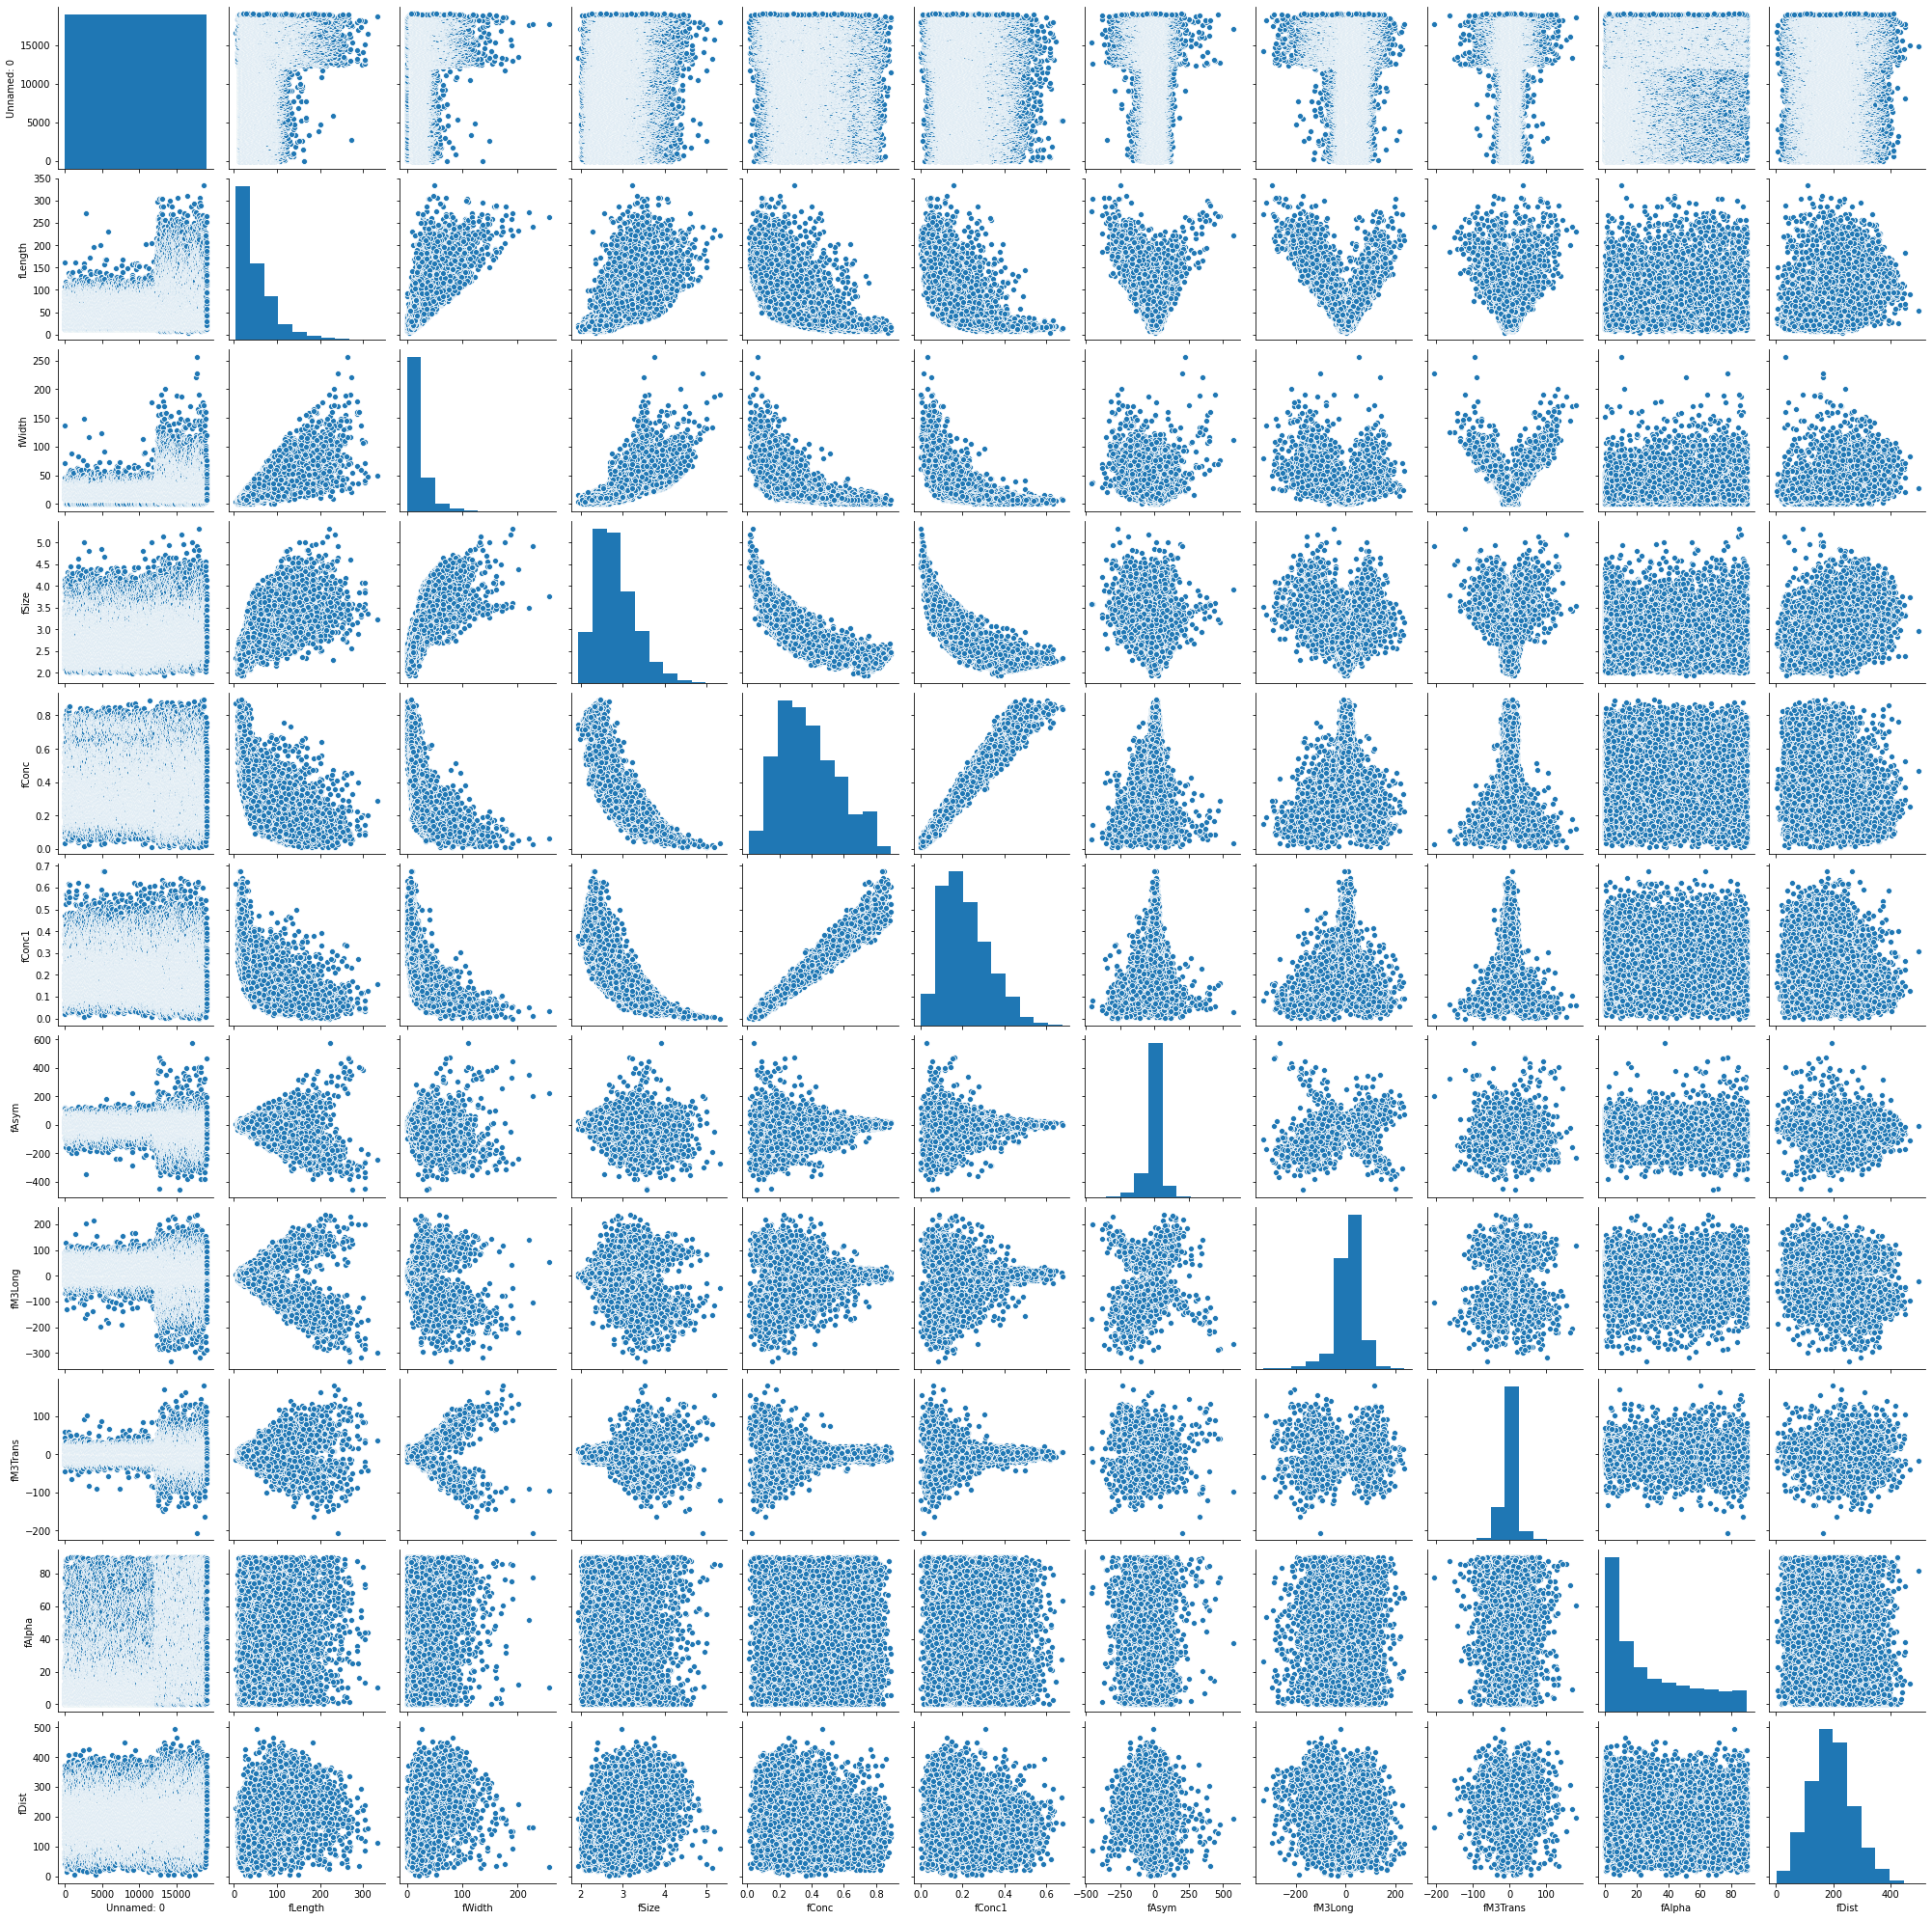

In [6]:
import seaborn as sns
df = dataset.copy()
sns.pairplot(data=df)

# Encoding dependent variable

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train)

print(y_train)

print(X_test)

print(y_test)

[[ 9.16800e+03  2.59857e+01  1.84585e+01 ...  1.52170e+01  5.61948e+01
   1.90330e+02]
 [ 8.38300e+03  3.75265e+01  2.17254e+01 ...  8.84510e+00  7.37420e+00
   1.41914e+02]
 [ 3.98000e+03  5.88047e+01  3.36055e+01 ...  2.65973e+01  4.68700e+00
   1.34654e+02]
 ...
 [ 9.84500e+03  3.58286e+01  1.68952e+01 ...  1.13048e+01  4.72000e-01
   2.34868e+02]
 [ 1.07990e+04  2.00986e+01  1.28671e+01 ...  7.87500e+00  2.16750e+01
   2.12098e+02]
 [ 2.73200e+03  2.72726e+01  1.26129e+01 ... -9.90080e+00  3.78900e+00
   1.85431e+02]]
[0 0 0 ... 0 0 0]
[[ 1.81520e+04  1.71822e+01  1.58933e+01 ... -3.99040e+00  6.69122e+01
   6.10713e+01]
 [ 2.57100e+03  3.37228e+01  1.82951e+01 ... -4.41960e+00  1.10782e+01
   9.41792e+01]
 [ 1.22020e+04  6.13737e+01  2.13660e+01 ... -1.22608e+01  9.76100e-01
   2.36924e+02]
 ...
 [ 7.51600e+03  4.28176e+01  1.75801e+01 ... -1.23568e+01  4.93610e+00
   1.25490e+02]
 [ 7.21000e+03  1.88943e+01  1.54488e+01 ...  6.38700e+00  2.70700e+00
   2.14564e+02]
 [ 9.50500e+03

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)

print(X_test)

[[-0.05742806 -0.63804528 -0.20286301 ...  0.71422492  1.08910714
  -0.04395788]
 [-0.20018608 -0.37000069 -0.02764681 ...  0.41054104 -0.77745557
  -0.69193922]
 [-1.00090404  0.12420305  0.60952788 ...  1.25660847 -0.88019554
  -0.7891043 ]
 ...
 [ 0.06568938 -0.40943581 -0.2867087  ...  0.52777    -1.04134804
   0.55212178]
 [ 0.2391813  -0.77477803 -0.50275094 ...  0.3643062  -0.2306917
   0.24737676]
 [-1.22786203 -0.60815597 -0.51638465 ... -0.48288601 -0.91452886
  -0.10952423]]
[[ 1.57637847 -0.84251383 -0.34044439 ... -0.20119715  1.49886653
  -1.77390718]
 [-1.25714106 -0.45834476 -0.21162677 ... -0.22165276 -0.63584018
  -1.33080364]
 [ 0.49432718  0.1838702  -0.04692279 ... -0.59536329 -1.02207474
   0.5796385 ]
 ...
 [-0.35785641 -0.24711053 -0.24997493 ... -0.59993863 -0.87067168
  -0.91175179]
 [-0.41350477 -0.8027489  -0.3642846  ...  0.29338833 -0.95589707
   0.28038076]
 [ 0.00385787  0.44615479 -0.01733303 ...  0.52395721 -0.87442235
   0.7709172 ]]


# Training the Random Forest Classification model on the Training set

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Predicting a new result

In [11]:
print(classifier.predict(sc.transform([[1, 31.6036, 11.7235, 2.5185, 0.5303, 0.3773, 26.2722, 23.8238, -9.9574, 6.3609, 205.261]])))

[0]


# Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[3078    1]
 [   0 1676]]
Accuracy: 99.98%


# Visualising predictions

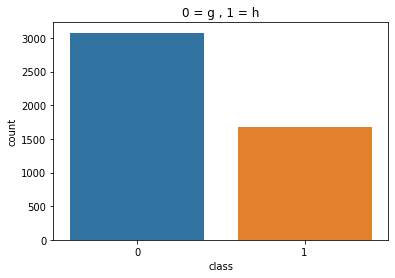

In [14]:
import seaborn as sns
sns.countplot(y_pred, data=dataset)
plt.title('0 = g , 1 = h')
plt.xlabel('class')
plt.show()

# Visualising real values

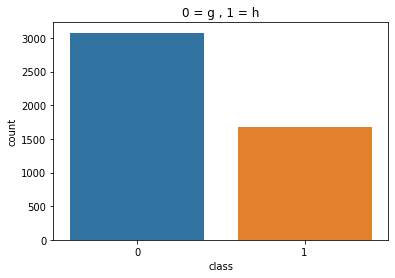

In [15]:
sns.countplot(y_test,  data=dataset)
plt.title('0 = g , 1 = h')
plt.xlabel('class')
plt.show()